In [2]:
try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
# pipmain(['install','gekko'])

[0, 0, 0, 0]


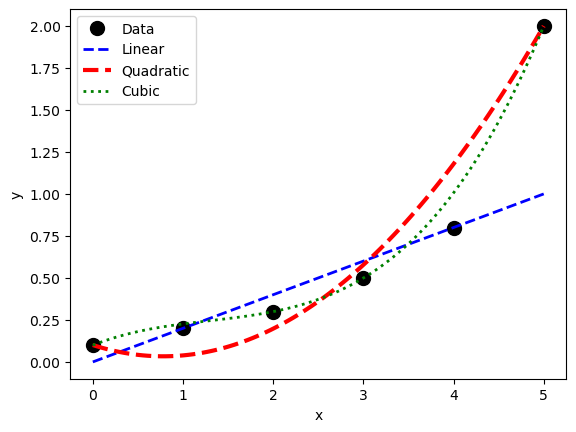

In [36]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt  

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

#### Solution
# m = GEKKO()
m=GEKKO(remote=False)
m.options.IMODE=2
# coefficients
c = [m.FV(value=0) for i in range(4)]
print(c)
x = m.Param(value=xm)
y = m.CV(value=ym)
y.FSTATUS = 1
# polynomial model
m.Equation(y==c[0]+c[1]*x+c[2]*x**2+c[3]*x**3)

# linear regression
c[0].STATUS=1
c[1].STATUS=1
m.solve(disp=False)
p1 = [c[1].value[0],c[0].value[0]]

# quadratic
c[2].STATUS=1
m.solve(disp=False)
p2 = [c[2].value[0],c[1].value[0],c[0].value[0]]

# cubic
c[3].STATUS=1
m.solve(disp=False)
p3 = [c[3].value[0],c[2].value[0],c[1].value[0],c[0].value[0]]

# plot fit
plt.plot(xm,ym,'ko',markersize=10)
xp = np.linspace(0,5,100)
plt.plot(xp,np.polyval(p1,xp),'b--',linewidth=2)
plt.plot(xp,np.polyval(p2,xp),'r--',linewidth=3)
plt.plot(xp,np.polyval(p3,xp),'g:',linewidth=2)
plt.legend(['Data','Linear','Quadratic','Cubic'],loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [37]:
eef = m.Array(m.Param,(5,3),value=0)

In [41]:
m = GEKKO(remote=False)
x_1 = m.Var(value=x[0])
x_2 = m.Var(value=x[1])
# print(x_1.value)
# print(x_2.value)
def f(x_1, x_2):
    return x_1**2 + x_2**2 + 1
m.Minimize(f(x_1, x_2))
m.Equation(f(x_1, x_2) >= 0) 
m.options.SOLVER = 1  # APOPT solver
m.solve(disp=False)
print('Profit: ' + str(m.options.OBJFCNVAL))
print('x1: ' + str(x_1.value))
print('x2: ' + str(x_2.value))

Profit: 1.0
x1: [0.0]
x2: [0.0]


In [22]:
from gekko import GEKKO
m = GEKKO(remote=False)
x1 = m.Var(lb=0, ub=5) # Product 1
x2 = m.Var(lb=0, ub=4) # Product 2
m.Maximize(100*x1+125*x2+x1**2+x2**2) # Profit function
m.Equation(3*x1+6*x2<=30) # Units of A
m.Equation(8*x1+4*x2<=44) # Units of B
m.solve(disp=False)
p1 = x1.value[0]; p2 = x2.value[0]
print('Product 1 (x1): ' + str(p1))
print('Product 2 (x2): ' + str(p2))
print('Profit        : ' + str(-m.options.objfcnval))
print('Solve time: ' + str(m.options.SOLVETIME))

Product 1 (x1): 4.0
Product 2 (x2): 3.0
Profit        : 800.0
Solve time: 0.029800000018


In [43]:
tup = 1,2
print(tup[0])

1
